In [1]:
import random,math,copy,time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (RandomForestClassifier,GradientBoostingClassifier)
from sklearn import tree
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,cross_val_score
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from tqdm import tqdm
import time
from sklearn.model_selection import GridSearchCV

C:\Users\SONAL BANSAL\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
m=20  # Problem dimension (number of decision variables
Ap=0.1  # Awareness probability
fl=2   # Flight length (fl)
wf=1.2# wf is used to control the importance of classification accuracy and number of selected features.


In [3]:
df=pd.read_csv("AD-MCI-CN.csv")


In [4]:
df = df.dropna(how='all')
# df=df.drop(columns=['Unnamed: 0'])
df.head()

,label,0,1,2,3,4,5,6,7,8,...,67590,67591,67592,67593,67594,67595,67596,67597,67598,67599
0,0,55,56,57,57,57,57,56,55,56,...,59,59,59,59,59,59,60,59,58,57
1,0,255,255,255,255,255,255,254,253,254,...,255,255,255,255,255,255,255,255,255,255
2,0,255,255,255,255,255,255,254,253,254,...,255,255,255,255,255,255,255,255,255,255
3,0,255,255,255,255,255,255,254,253,254,...,255,255,255,255,255,255,255,255,255,255
4,0,255,255,255,255,255,255,254,253,254,...,255,255,255,255,255,255,255,255,255,255


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2186 entries, 0 to 2185
Columns: 67601 entries, label to 67599
dtypes: int64(67601)
memory usage: 1.1 GB


In [7]:
val_Data = pd.read_csv("AD-MCI-CN_val.csv")
val_Data = val_Data.dropna(how='all')
#val_Data=val_Data.drop(columns=['Unnamed: 0'])

In [8]:
val_Data.head()

,label,0,1,2,3,4,5,6,7,8,...,67590,67591,67592,67593,67594,67595,67596,67597,67598,67599
0,0,255,255,255,255,255,255,254,253,254,...,255,255,255,255,255,255,255,255,255,255
1,0,255,255,255,255,255,255,254,253,254,...,255,255,255,255,255,255,255,255,255,255
2,0,255,255,255,255,255,255,254,253,254,...,255,255,255,255,255,255,255,255,255,255
3,0,255,255,255,255,255,255,254,253,254,...,255,255,255,255,255,255,255,255,255,255
4,0,255,255,255,255,255,255,254,253,254,...,255,255,255,255,255,255,255,255,255,255


In [9]:
val_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 611 entries, 0 to 610
Columns: 67601 entries, label to 67599
dtypes: int64(67601)
memory usage: 315.1 MB


In [10]:
features = [i for i in range(0,67600)]

In [11]:
d=67600# Flock (population) size
lt=67600
y_train=df['label']
x_train=df[df.columns[1:]]
x_train.columns=features

In [12]:
y_test = val_Data['label']
x_test = val_Data[val_Data.columns[1:]]
x_test.columns=features

## WITHOUT GRID-SEARCH AND WITHOUT BIO-INSPIRED

In [13]:
print(time.time())

neigh1 = KNeighborsClassifier()
neigh1.fit(x_train, y_train)
neigh1.predict(x_test)
nacc1=neigh1.score(x_test,y_test)

print(nacc1)

#
rforest1 = RandomForestClassifier()
rforest1.fit(x_train, y_train)
rforest1.predict(x_test)
rfacc1=rforest1.score(x_test,y_test)

print(rfacc1)

#
dtree1 = tree.DecisionTreeClassifier()
dtree1.fit(x_train, y_train)
dtree1.predict(x_test)
dtacc1=dtree1.score(x_test,y_test)

print(dtacc1)

clf1 = svm.SVC()
clf1.fit(x_train, y_train)
clf1.predict(x_test)
clfacc1=clf1.score(x_test,y_test)

print(clfacc1)


1553597000.4880366
0.5531914893617021
0.6955810147299509
0.6693944353518821
0.6873977086743044


In [15]:
im=(rforest1.feature_importances_)
print(im)

[0. 0. 0. ... 0. 0. 0.]


In [16]:
imo=pd.Series()
for i in tqdm(range(d)):
    imo= imo.set_value(features[i],im[i])

  0%|                                                                                        | 0/67600 [00:00<?, ?it/s]C:\Users\SONAL BANSAL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until
100%|███████████████████████████████████████████████████████████████████████████| 67600/67600 [09:30<00:00, 118.50it/s]


In [ ]:
imo

In [17]:
imo.to_csv('importance_feature_AD-MCI-CN.csv')
len(imo)

67600

## WITH GRID-SEARCH WITHOUT BIO-INSPIRED

In [ ]:
dtparams = {'criterion':['gini', 'entropy'], 'splitter':['best','random'], 'max_depth':[10,20,30], 'min_samples_split':[5,10,20], 'min_samples_leaf':[2,4,6]}
grid_dt = GridSearchCV(dtree1, dtparams, verbose=2)
grid_dt.fit(x_train, y_train)
grid_dt.predict(x_test)
print(grid_dt.best_score_)
print(grid_dt.best_params_)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, splitter=best 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, splitter=best, total= 3.6min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.6min remaining:    0.0s


[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, splitter=best 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, splitter=best, total= 1.9min
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, splitter=best 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, splitter=best, total= 2.2min
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, splitter=random 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, splitter=random, total=  24.4s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, splitter=random 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, splitter=random, total=  29.8s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, splitter=random 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, splitter=random, total=  31.2s
[CV

[CV] criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=10, splitter=random 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=10, splitter=random, total=  31.6s
[CV] criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=10, splitter=random 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=10, splitter=random, total=  31.2s
[CV] criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=20, splitter=best 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=20, splitter=best, total= 2.0min
[CV] criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=20, splitter=best 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=20, splitter=best, total= 2.0min
[CV] criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=20, splitter=best 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=20, splitter=best, total= 1.9m

In [ ]:
rfparams = {'n_estimators':[10,100,200,300,400,500], 'criterion':['gini','entropy'], 'max_depth':[10,20,30], 'min_samples_split':[5,10,20], 'min_samples_leaf':[2,4,6]}
grid_rf = GridSearchCV(rforest1, rfparams, verbose=2)
grid_rf.fit(x_train, y_train)
grid_rf.predict(x_test)
print(grid_rf.best_score_)
print(grid_rf.best_params_)

In [ ]:
svcparams = {'C':[1.0,10,100,1000], 'kernel':['rbf','linear', 'poly', 'sigmoid'], 'degree':[3,4,5], 'gamma':['auto',0.1,0.01,0.001]}
grid_svc = GridSearchCV(clf1, svcparams, verbose=2)
grid_svc.fit(x_train, y_train)
grid_svc.predict(x_test)
print(grid_svc.best_score_)
print(grid_svc.best_params_)

In [ ]:
knnparams = {'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'], 'n_neighbors':[3, 4, 5, 6, 7], 'leaf_size':[10, 20, 30, 40], 'p':[1, 2, 3]}
grid_knn = GridSearchCV(neigh1, knnparams, verbose=2)
grid_knn.fit(x_train, y_train)
grid_knn.predict(x_test)
print(grid_knn.best_score_)
print(grid_knn.best_params_)

In [18]:
def init():   #initialization function
    df2=pd.DataFrame(np.ones((m,d),dtype='int'),columns=features)
    return df2
#df2=init()

## FITNESS FUNCTION

In [19]:
# this defines the fitness of each crow by calculating their accuracy and no features selected using the below formula
def fitness(df2):      # fitness function whose 1 parameter takes the crows and their position as input
    fnt=np.zeros((m,1))  # fnt is the fitness function
    for k in tqdm(range(m)):    
        global sel
        sel=[]
        q=0
        imp=0
        a=(df2.iloc[k,:])==0.0
        if a.all()==True:
            df2.iloc[k,:]=1.0
        for p in list(features):
            if df2.loc[k,p]==1.0:
                sel.insert(q,p)
                temp=imo[p]
                imp=imp+temp
            q=q+1
        lf=len(sel)
        divide=lf/lt
        fnt[k]=imp+wf*(1-float(lf/lt))     # fitness formula
    return fnt


In [20]:
z=init()   #crow memory with initial position
tmax=50   # Maximum number of iterations (itermax)
xn=z.copy()  # the position of the crow
mem=init()  # memory is initialized using the init function
xnew=(xn).copy()   # the positions of the crow
ft=fitness(xn)
plotit=[]

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [02:13<00:00,  6.69s/it]


## FEATURES IMPORTANCE

In [21]:
tottime=0
# it is a formula to convert positions of each crow into 0 and 1 
for t in range(tmax):
    print(t)# no of iterations
    time1=time.time()
   
    xnew_list = []
    plotit.append(ft.max())
    num = random.randint(0,m-1)  
   # Generation of random candidate crows for following (chasing)
    for i in tqdm(range(m)):   
       
        r=random.random()
        if r>=Ap:
            
            xnew_list.append((xn.loc[i,:]+fl*r*(mem.loc[num,:]-xn.loc[i,:])).tolist())# Generation of a new position for crow i (state 1)
            
        else:
            
            xnew_list.append((xnew.loc[i,:].apply(lambda lam:random.random())).tolist())   # Generation of a new position for crow i (state 2)
            
            
    xnew = pd.DataFrame(xnew_list)
    del xnew_list
    print('transpose')
    xnew= 1/( 1 + np.expm1(( 10*(xnew-0.5))))    #  formula to convert positions of each crow into 0 and 1
    print('exp')
    xnew=xnew.apply(lambda l:l>=random.random()).astype(int)
    print('apply lambda')
    xn=xnew.copy()     
    print('copied')
    # it is the updated binary position of each crow
    #feasibility test
    # this is done so that to check if atleast one position of the crow has value equal to 1. if it is not true then every
    # position value of the crow is made 1.
    for i in tqdm(range(m)):
        
        if ((xn.loc[i,:])==0.0).all()==True:
            xn.loc[i,:]=1.0
    
    print('running fitness')
    ft_new=fitness(xn).reshape(ft.shape)# here the accuracy of each crows are calculated.

    print('fitness done')
    for i in tqdm(range(m)):
         
        if ft_new[i]>ft[i]:
            ft[i]=ft_new[i]
            for j in features:
                mem.loc[i,j]= xn.loc[i,j]
    
    print('complete'+str(t))
    time2=time.time()
    tottime=tottime+(time2-time1)
print(tottime/t+1)


0


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 34.46it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 199.67it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:03<00:00,  3.19s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [30:02<00:00, 90.12s/it]


complete0
1


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 40.41it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 216.82it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:45<00:00,  5.29s/it]


fitness done


100%|████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 2481.91it/s]


complete1
2


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 50.47it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 181.38it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:46<00:00,  5.35s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:30<00:00,  4.54s/it]


complete2
3


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 60.26it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 218.07it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:48<00:00,  5.41s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


complete3
4


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 35.47it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 280.24it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:46<00:00,  5.34s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


complete4
5


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 45.37it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 164.61it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:42<00:00,  5.12s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


complete5
6


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 42.84it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 238.85it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:49<00:00,  5.46s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


complete6
7


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 57.25it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 317.99it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:42<00:00,  5.14s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


complete7
8


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 56.04it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 223.13it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:47<00:00,  5.37s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


complete8
9


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 38.51it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 245.79it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:45<00:00,  5.26s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


complete9
10


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 49.18it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 151.36it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:19<00:00,  3.96s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [04:19<00:00, 12.96s/it]


complete10
11


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 46.09it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 244.33it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:53<00:00,  5.66s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


complete11
12


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 36.68it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 163.66it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:29<00:00,  4.49s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:26<00:00,  4.34s/it]


complete12
13


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 74.02it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 151.97it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:31<00:00,  4.60s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 446202.55it/s]


complete13
14


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 67.55it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 200.35it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:29<00:00,  4.48s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


complete14
15


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 90.30it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 271.59it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:48<00:00,  5.41s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


complete15
16


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 48.32it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 246.49it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:50<00:00,  5.51s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


complete16
17


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 49.71it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 279.83it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:51<00:00,  5.58s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


complete17
18


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 43.80it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 197.72it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:26<00:00,  4.32s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 163520.62it/s]


complete18
19


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 63.09it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 281.67it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:23<00:00,  4.18s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


complete19
20


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 92.20it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 244.31it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:22<00:00,  4.11s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:09<00:00,  3.49s/it]


complete20
21


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 68.61it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 279.34it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:24<00:00,  4.24s/it]


fitness done


100%|████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 1981.67it/s]


complete21
22


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 58.54it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 516.87it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:21<00:00,  4.07s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


complete22
23


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 64.15it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 351.05it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:26<00:00,  4.34s/it]


fitness done


100%|████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 9427.52it/s]


complete23
24


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 49.31it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 238.34it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:19<00:00,  3.96s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


complete24
25


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 74.74it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 270.81it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:26<00:00,  4.32s/it]


fitness done


100%|████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 9548.79it/s]


complete25
26


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 92.22it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 277.95it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:14<00:00,  3.74s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


complete26
27


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 64.13it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 164.69it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:31<00:00,  4.56s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


complete27
28


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 57.99it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 196.85it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:26<00:00,  4.31s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


complete28
29


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 46.57it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 314.91it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:31<00:00,  4.55s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


complete29
30


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 60.10it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 313.05it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:25<00:00,  4.28s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


complete30
31


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 96.78it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 319.91it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:28<00:00,  4.40s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


complete31
32


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 49.51it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 226.73it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:17<00:00,  3.86s/it]


fitness done


100%|████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 2470.94it/s]


complete32
33


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 73.95it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 351.05it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:26<00:00,  4.34s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


complete33
34


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 58.44it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 312.97it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:26<00:00,  4.33s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


complete34
35


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 94.64it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 271.10it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:28<00:00,  4.41s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


complete35
36


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 52.26it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 271.66it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:23<00:00,  4.20s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:10<00:00,  3.54s/it]


complete36
37


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 55.95it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 319.81it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:25<00:00,  4.28s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


complete37
38


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 67.49it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 246.36it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:22<00:00,  4.13s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


complete38
39


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 91.34it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 275.79it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:26<00:00,  4.33s/it]


fitness done


100%|████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 2494.68it/s]


complete39
40


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 66.32it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 212.39it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:10<00:00,  3.52s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


complete40
41


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 66.60it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 244.65it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:25<00:00,  4.27s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


complete41
42


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 57.20it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 270.98it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:26<00:00,  4.34s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


complete42
43


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 63.28it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 278.29it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:22<00:00,  4.10s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


complete43
44


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 76.25it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 221.55it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:12<00:00,  3.64s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


complete44
45


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 75.50it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 270.87it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:22<00:00,  4.12s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


complete45
46


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 63.02it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 270.84it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:24<00:00,  4.21s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


complete46
47


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 53.66it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 273.03it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:28<00:00,  4.44s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:14<00:00,  3.70s/it]


complete47
48


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 54.34it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 279.79it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:26<00:00,  4.35s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


complete48
49


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 55.10it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 249.09it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:28<00:00,  4.43s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


complete49
183.94874027797155


## WITHOUT GRID SEARCH , WITH BIO-INSPIRED

In [23]:
# here the accuracy of each crows are calculated.
neigh2 = KNeighborsClassifier()
rforest2 =RandomForestClassifier()
dtree2 = tree.DecisionTreeClassifier()
clf2 = svm.SVC()

nacc2=np.zeros((m,1),dtype='float64')
rfacc2=np.zeros((m,1),dtype='float64')
dtacc2=np.zeros((m,1),dtype='float64')
clfacc2=np.zeros((m,1),dtype='float64')

q=0
for i in tqdm(range(m)):
    print(i)
    select=[]
    for p in list(features):
        if mem.loc[i,p]==1:
            select.insert(q,p)
            q=q+1
    neigh2.fit(x_train[select], y_train)
    neigh2.predict(x_test[select])
    nacc2[i]=neigh2.score(x_test[select],y_test) 
    print(nacc2[i])
    
    rforest2.fit(x_train[select], y_train)
    rforest2.predict(x_test[select])
    rfacc2[i]=rforest2.score(x_test[select],y_test) 
    print(rfacc2[i])
    
    dtree2.fit(x_train[select], y_train)
    dtree2.predict(x_test[select])
    dtacc2[i]=dtree2.score(x_test[select],y_test)
    print(dtacc2[i])
    
    clf2.fit(x_train[select], y_train)
    clf2.predict(x_test[select])
    clfacc2[i]=clf2.score(x_test[select],y_test)
    print(clfacc2[i])

print (nacc2.max(), rfacc2.max(), dtacc2.max(),clfacc2.max()) # the crow with maximum accuracy is printed

  0%|                                                                                           | 0/20 [00:00<?, ?it/s]

0
[0.49263502]
[0.6710311]
[0.68248773]
[0.68739771]


  5%|████▏                                                                              | 1/20 [00:39<12:35, 39.77s/it]

1
[0.49263502]
[0.66284779]
[0.66939444]
[0.68739771]


 10%|████████▎                                                                          | 2/20 [01:10<10:33, 35.18s/it]

2
[0.49263502]
[0.67757774]
[0.67594108]
[0.68739771]


 15%|████████████▍                                                                      | 3/20 [01:39<09:22, 33.10s/it]

3
[0.57446809]
[0.65630115]
[0.64320786]
[0.68739771]


 20%|████████████████▍                                                                 | 4/20 [11:52<47:30, 178.15s/it]

4
[0.49263502]
[0.6710311]
[0.66448445]
[0.68739771]


 25%|████████████████████▌                                                             | 5/20 [12:25<37:15, 149.01s/it]

5
[0.54991817]
[0.68576105]
[0.67757774]
[0.68739771]


 30%|████████████████████████                                                        | 6/20 [27:02<1:03:06, 270.43s/it]

6
[0.49263502]
[0.65957447]
[0.66775777]
[0.68739771]


 35%|████████████████████████████▋                                                     | 7/20 [27:35<51:14, 236.47s/it]

7
[0.57446809]
[0.68248773]
[0.67757774]
[0.68739771]


 40%|████████████████████████████████▊                                                 | 8/20 [32:51<49:17, 246.44s/it]

8
[0.49263502]
[0.66612111]
[0.65139116]
[0.68739771]


 45%|████████████████████████████████████▉                                             | 9/20 [33:22<40:47, 222.49s/it]

9
[0.49263502]
[0.69230769]
[0.65466448]
[0.68739771]


 50%|████████████████████████████████████████▌                                        | 10/20 [33:54<33:54, 203.43s/it]

10
[0.49263502]
[0.69558101]
[0.66284779]
[0.68739771]


 55%|████████████████████████████████████████████▌                                    | 11/20 [34:24<28:08, 187.64s/it]

11
[0.49263502]
[0.68903437]
[0.67757774]
[0.68739771]


 60%|████████████████████████████████████████████████▌                                | 12/20 [34:54<23:16, 174.58s/it]

12
[0.49263502]
[0.68412439]
[0.66612111]
[0.68739771]


 65%|████████████████████████████████████████████████████▋                            | 13/20 [35:24<19:04, 163.45s/it]

13
[0.49263502]
[0.67757774]
[0.65793781]
[0.68739771]


 70%|████████████████████████████████████████████████████████▋                        | 14/20 [35:56<15:24, 154.01s/it]

14
[0.49263502]
[0.68576105]
[0.66939444]
[0.68739771]


 75%|████████████████████████████████████████████████████████████▊                    | 15/20 [36:27<12:09, 145.86s/it]

15
[0.49263502]
[0.66939444]
[0.66284779]
[0.68739771]


 80%|████████████████████████████████████████████████████████████████▊                | 16/20 [37:00<09:15, 138.77s/it]

16
[0.49263502]
[0.66121113]
[0.66284779]
[0.68739771]


 85%|████████████████████████████████████████████████████████████████████▊            | 17/20 [37:33<06:37, 132.58s/it]

17
[0.49263502]
[0.68248773]
[0.67266776]
[0.68739771]


 90%|████████████████████████████████████████████████████████████████████████▉        | 18/20 [38:06<04:14, 127.04s/it]

18
[0.49263502]
[0.66939444]
[0.6710311]
[0.68739771]


 95%|████████████████████████████████████████████████████████████████████████████▉    | 19/20 [38:36<02:01, 121.94s/it]

19
[0.49263502]
[0.68412439]
[0.67430442]
[0.68739771]


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [39:08<00:00, 117.41s/it]


0.574468085106383 0.6955810147299509 0.6824877250409165 0.6873977086743044


**SELECTED FEATURED**

In [25]:
print ((mem.loc[nacc1.argmax(),:]==1.0).sum())

print ((mem.loc[rfacc1.argmax(),:]==1.0).sum())
print ((mem.loc[dtacc1.argmax(),:]==1.0).sum())
print ((mem.loc[clfacc1.argmax(),:]==1.0).sum())

456
456
456
456


In [27]:
plotse=pd.Series(plotit)
print(plotit)

[0.999999999999999, 1.1959034530234518, 1.1959034530234518, 1.1959034530234518, 1.1959034530234518, 1.1959034530234518, 1.1959034530234518, 1.1959034530234518, 1.1959034530234518, 1.1959034530234518, 1.1959034530234518, 1.1959034530234518, 1.1959034530234518, 1.1959034530234518, 1.1959034530234518, 1.1959034530234518, 1.1959034530234518, 1.1959034530234518, 1.1959034530234518, 1.1959034530234518, 1.1959034530234518, 1.203099968394941, 1.203099968394941, 1.203099968394941, 1.203099968394941, 1.203099968394941, 1.203099968394941, 1.203099968394941, 1.203099968394941, 1.203099968394941, 1.203099968394941, 1.203099968394941, 1.203099968394941, 1.203099968394941, 1.203099968394941, 1.203099968394941, 1.203099968394941, 1.203099968394941, 1.203099968394941, 1.203099968394941, 1.203099968394941, 1.203099968394941, 1.203099968394941, 1.203099968394941, 1.203099968394941, 1.203099968394941, 1.203099968394941, 1.203099968394941, 1.203099968394941, 1.203099968394941]


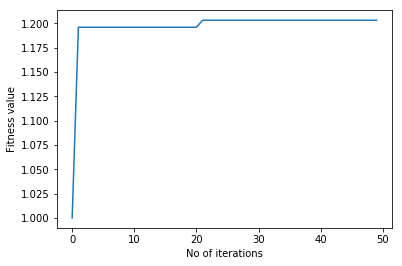

In [28]:
plt.plot(plotse)
plt.xlabel('No of iterations')
plt.ylabel('Fitness value')
plt.show()

In [26]:
mem.to_csv('memory_AD-MCI-CN.csv')